Airbnb Listing Analysis Case Study 

In [249]:
#importing airbnb data 

import pandas as pd
listing = pd.read_csv(
    "Listings.csv", 
    encoding="ISO-8859-1", 
    dtype={5: str, 13: str},
    low_memory=False
)

In [250]:
listing.shape

(279712, 33)

In [251]:
listing['host_since'] = pd.to_datetime(listing['host_since'])

In [252]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [253]:
# Filter rows where the city is Paris and Keep only the specified columns

paris_data = (
    listing
    .query('city == "Paris"')
    .loc[:,['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)


# Display the filtered data
paris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [254]:
#QA the Paris listings data: check for missing values

#missing data
missing_paris_data = paris_data.isnull().sum()
print(missing_paris_data)


host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64


In [263]:
#calculate the minimum, maximum, and average for each numeric field

paris_data.describe().round(1)

,host_since,accommodates,price
count,64657,64690.0,64690.0
mean,2015-11-01 11:06:05.528867584,3.0,113.1
min,2008-08-30 00:00:00,0.0,0.0
25%,2014-03-09 00:00:00,2.0,59.0
50%,2015-07-07 00:00:00,2.0,80.0
75%,2017-05-29 00:00:00,4.0,120.0
max,2021-02-07 00:00:00,16.0,12000.0
std,NaN,1.6,214.4


In [265]:
paris_data.query("accommodates == 0").count()


host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [233]:
paris_data.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [283]:
# groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

paris_listings_neighbourhood = (
    paris_data
    .groupby('neighbourhood')
    .agg({"price":"mean"})
    .reset_index()
    .sort_values('price')
    .set_index("neighbourhood")
)

paris_listings_neighbourhood


,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [289]:
# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, 
# and add the mean price for each value of ‘accommodates’ (sorted low to high)

# Step 1: Get the most expensive neighbourhood
most_expensive_neighbourhood = paris_listings_neighbourhood.sort_values(by='price', ascending=False).index[0]

# Step 2: Filter the Paris data to this neighbourhood and group by 'accommodates' and calculate mean price
paris_listings_accommodations = (
    paris_data
    .query("neighbourhood == @most_expensive_neighbourhood")  
    .groupby('accommodates')
    .agg({"price": "mean"})
    .sort_values('price')

)


paris_listings_accommodations


,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [309]:
# Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of 
# rows representing the number of new hosts

"""paris_listings_over_time = (
    paris_data
    .assign(year=paris_data['host_since'].dt.year)
    .groupby("year")
    .agg(price_mean=('price', 'mean'),
         new_hosts=('price', 'count'))
    .reset_index()
    .sort_values('year')
) """ 

#or another method would be: 

paris_listings_over_time = (
    paris_data
    .set_index("host_since")
    .resample("YE")
    .agg({"price":"mean", 
          "neighbourhood":"count"})
    .reset_index()
    .set_index("host_since")
)


paris_listings_over_time

,price,neighbourhood
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592
2013-12-31,107.096414,8142
2014-12-31,100.253800,10922
2015-12-31,103.646250,12147
2016-12-31,114.159847,8871


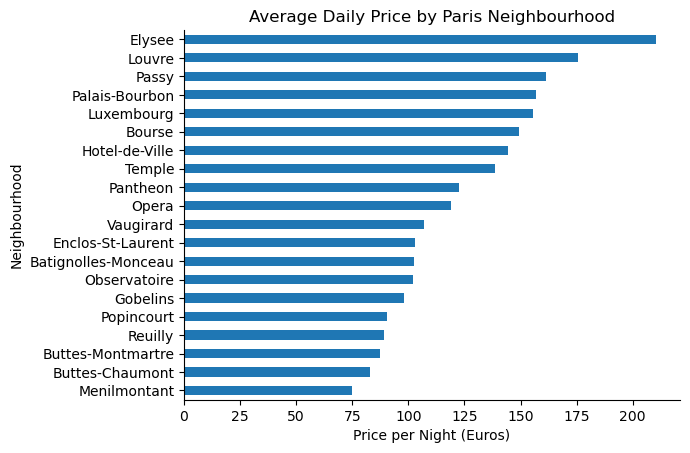

In [293]:
import seaborn as sns 

(paris_listings_neighbourhood
.plot
.barh(
    title="Average Daily Price by Paris Neighbourhood",
    xlabel="Price per Night (Euros)",
    ylabel= "Neighbourhood",
    legend=None
)
)

sns.despine()

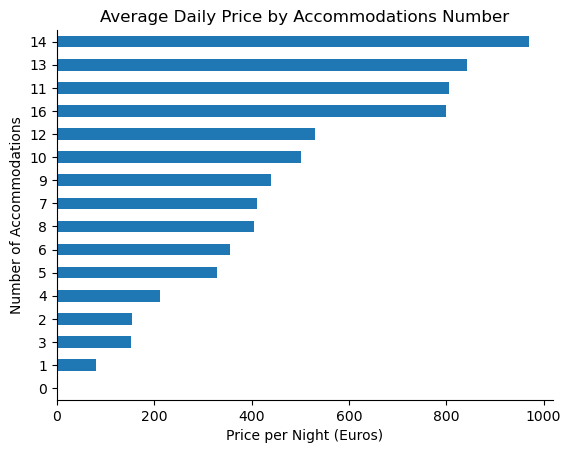

In [297]:
(paris_listings_accommodations
.plot
.barh(
    title="Average Daily Price by Accommodations Number",
    xlabel="Price per Night (Euros)",
    ylabel="Number of Accommodations",
    legend=None
)
)

sns.despine()

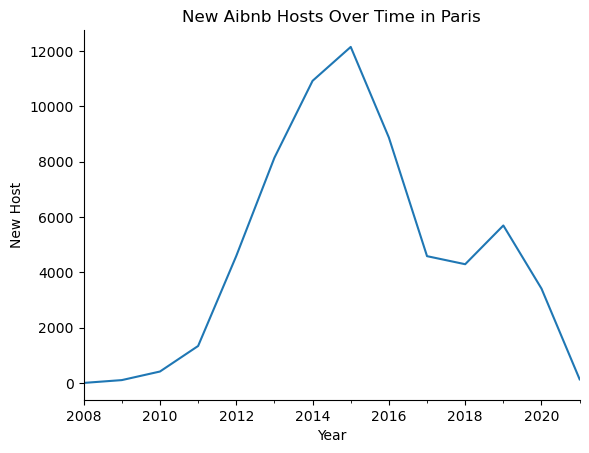

In [317]:
(paris_listings_over_time["neighbourhood"]
.plot
.line(
    title="New Aibnb Hosts Over Time in Paris",
    xlabel="Year",
    ylabel="New Host",
    legend=None
)
)

sns.despine()

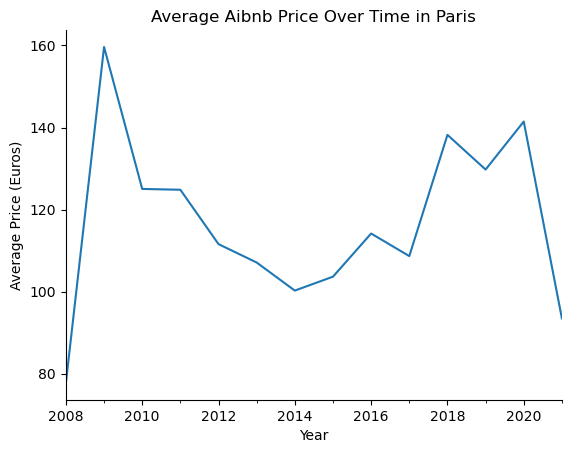

In [321]:
(paris_listings_over_time["price"]
.plot
.line(
    title="Average Aibnb Price Over Time in Paris",
    xlabel="Year",
    ylabel="Average Price (Euros)",
    legend=None
)
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

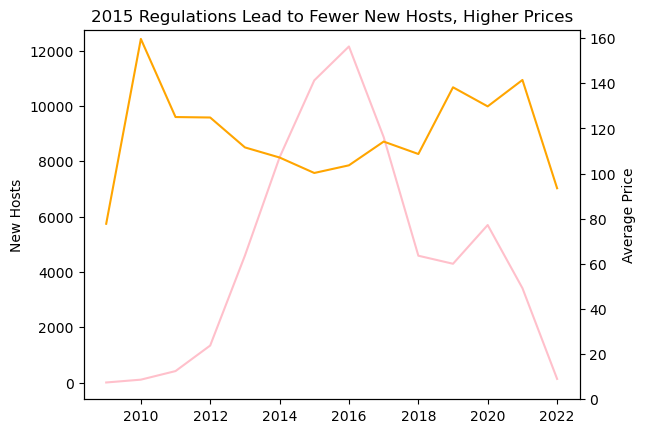

In [337]:
import matplotlib.pyplot as plt 

#creates ax (chart) and fig(overall figure with the title and x and y labels)
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

#defines that in the figure, we want to set a new figure with the same x-axis, but plotted on the right side 
ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
    c="orange"
)

#setting y-axis of price to zero 
ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

#setting a title 
ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")
